In [1]:
#Importing the Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
house = pd.read_csv('housing-unclean.csv')
house.head()

,0.00632,18.0,2.31,0.0,0.5379999999999999,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [3]:
house = house.set_axis(['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv'],axis=1)

In [4]:
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [5]:
house.round(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.0273,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.0273,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.0324,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.0690,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.0298,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,0.1588,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
601,0.1884,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15,20.0
602,0.3315,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
603,0.0537,0.0,13.92,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39,27.1


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     553 non-null    float64
 1   zn       559 non-null    float64
 2   indus    605 non-null    float64
 3   chas     554 non-null    float64
 4   nox      605 non-null    float64
 5   rm       605 non-null    float64
 6   age      586 non-null    float64
 7   dis      605 non-null    float64
 8   rad      570 non-null    float64
 9   tax      588 non-null    float64
 10  ptratio  605 non-null    float64
 11  b        605 non-null    float64
 12  lstat    605 non-null    float64
 13  medv     605 non-null    float64
dtypes: float64(14)
memory usage: 66.3 KB


<Axes: >

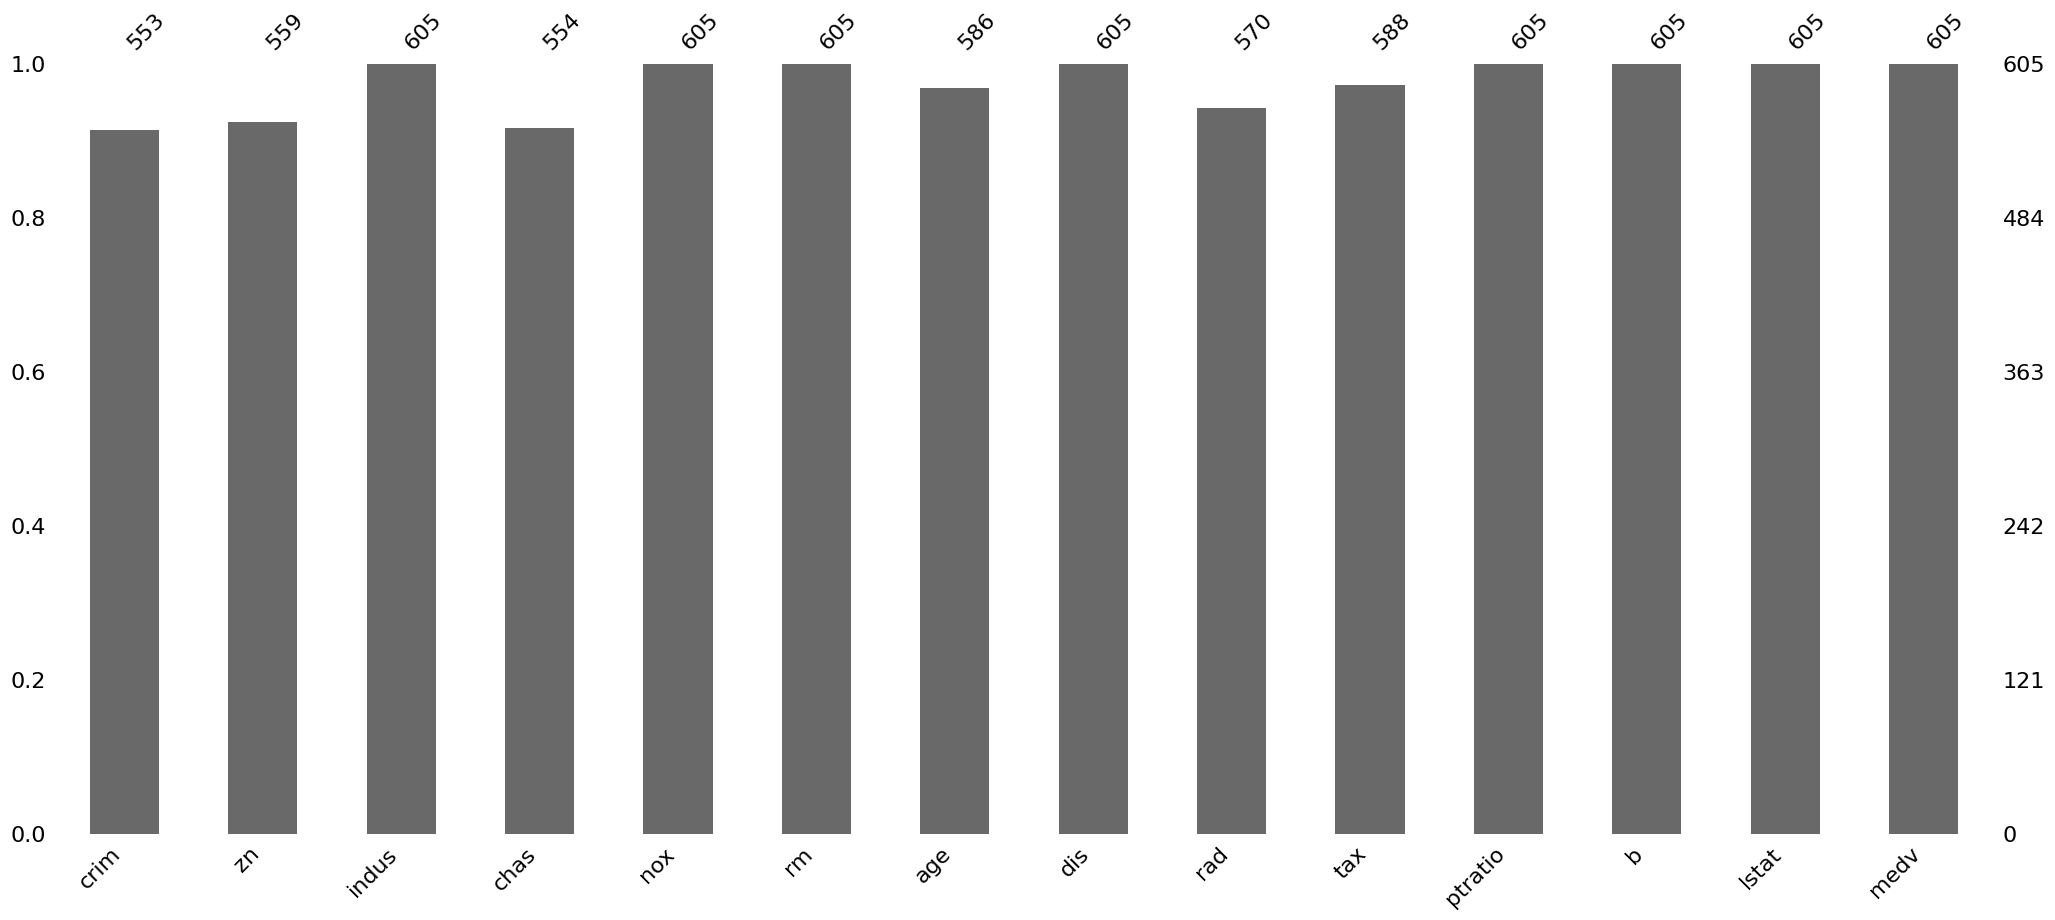

In [7]:
msno.bar(house)

In [8]:
na_features = [feature for feature in house.columns if house[feature].isnull().sum()>1]

for feature in na_features:
  print(f"{feature}:{house[feature].isna().mean()*100:.3f}%missing value")

crim:8.595%missing value
zn:7.603%missing value
chas:8.430%missing value
age:3.140%missing value
rad:5.785%missing value
tax:2.810%missing value


In [9]:
house.nunique()

,0
crim,503
zn,25
indus,75
chas,2
nox,81
rm,445
age,356
dis,411
rad,9
tax,66


In [10]:
print(house['zn'].value_counts())

zn
0.0      409
20.0      23
80.0      17
25.0      12
22.0      11
12.5      11
40.0       7
90.0       7
30.0       7
45.0       6
95.0       5
60.0       5
28.0       4
21.0       4
55.0       4
70.0       4
33.0       4
35.0       4
75.0       3
52.5       3
34.0       3
82.5       2
85.0       2
17.5       1
100.0      1
Name: count, dtype: int64


In [11]:
print(house['chas'].value_counts())

chas
0.0    515
1.0     39
Name: count, dtype: int64


In [12]:
print(house['age'].value_counts())

age
100.0    50
96.0      8
95.4      5
97.9      5
98.8      5
         ..
18.8      1
38.3      1
13.9      1
38.4      1
89.3      1
Name: count, Length: 356, dtype: int64


In [13]:
print(house['rad'].value_counts())

rad
24.0    144
4.0     130
5.0     127
3.0      42
8.0      29
6.0      29
2.0      28
1.0      22
7.0      19
Name: count, dtype: int64


In [14]:
print(house['tax'].value_counts())

tax
666.0    153
307.0     54
403.0     34
437.0     20
304.0     16
        ... 
187.0      1
313.0      1
226.0      1
469.0      1
244.0      1
Name: count, Length: 66, dtype: int64


In [15]:
print(house.shape)

(605, 14)


In [16]:
house.dropna(inplace = True)
print(house.shape)

(553, 14)


In [17]:
house.duplicated().sum()

48

In [18]:
dup_features = [feature for feature in house.columns if house[feature].duplicated().sum()]
house[dup_features].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [19]:
house.drop_duplicates(inplace = True)
print(house.shape)

(505, 14)


In [20]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,505.0,3.620667,8.608572,0.00906,0.08221,0.25915,3.67822,88.9762
zn,505.0,11.350495,23.343704,0.00000,0.00000,0.00000,12.50000,100.0000
indus,505.0,11.154257,6.855868,0.46000,5.19000,9.69000,18.10000,27.7400
chas,505.0,0.069307,0.254227,0.00000,0.00000,0.00000,0.00000,1.0000
nox,505.0,0.554728,0.115990,0.38500,0.44900,0.53800,0.62400,0.8710
rm,505.0,6.284059,0.703195,3.56100,5.88500,6.20800,6.62500,8.7800
age,505.0,68.581584,28.176371,2.90000,45.00000,77.70000,94.10000,100.0000
dis,505.0,3.794459,2.107757,1.12960,2.10000,3.19920,5.21190,12.1265
rad,505.0,9.566337,8.707553,1.00000,4.00000,5.00000,24.00000,24.0000
tax,505.0,408.459406,168.629992,187.00000,279.00000,330.00000,666.00000,711.0000


In [21]:
house.skew()

,0
crim,5.218396
zn,2.225665
indus,0.292762
chas,3.401726
nox,0.727784
rm,0.405743
age,-0.599111
dis,1.011674
rad,1.002744
tax,0.666800


In [22]:
house.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200283,0.406251,-0.056132,0.420934,-0.218978,0.352701,-0.379627,0.625396,0.582568,0.289394,-0.384839,0.455329,-0.388249
zn,-0.200283,1.000000,-0.534022,-0.042550,-0.516574,0.311835,-0.569524,0.664395,-0.311717,-0.314351,-0.391713,0.175319,-0.412894,0.360393
indus,0.406251,-0.534022,1.000000,0.062350,0.764556,-0.391330,0.645543,-0.708848,0.594167,0.720561,0.380955,-0.356506,0.602737,-0.484126
chas,-0.056132,-0.042550,0.062350,1.000000,0.091134,0.091497,0.086461,-0.099109,-0.007907,-0.035965,-0.122570,0.049040,-0.054576,0.175364
nox,0.420934,-0.516574,0.764556,0.091134,1.000000,-0.302127,0.731461,-0.769221,0.611758,0.668141,0.188918,-0.380006,0.591262,-0.427295
rm,-0.218978,0.311835,-0.391330,0.091497,-0.302127,1.000000,-0.240211,0.205170,-0.209277,-0.291680,-0.355116,0.127754,-0.613734,0.695365
age,0.352701,-0.569524,0.645543,0.086461,0.731461,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273486,0.602782,-0.376932
dis,-0.379627,0.664395,-0.708848,-0.099109,-0.769221,0.205170,-0.747872,1.000000,-0.494798,-0.534492,-0.232561,0.291451,-0.497277,0.249896
rad,0.625396,-0.311717,0.594167,-0.007907,0.611758,-0.209277,0.456232,-0.494798,1.000000,0.910202,0.463322,-0.444065,0.487608,-0.381690
tax,0.582568,-0.314351,0.720561,-0.035965,0.668141,-0.291680,0.506527,-0.534492,0.910202,1.000000,0.460100,-0.441505,0.543435,-0.468543


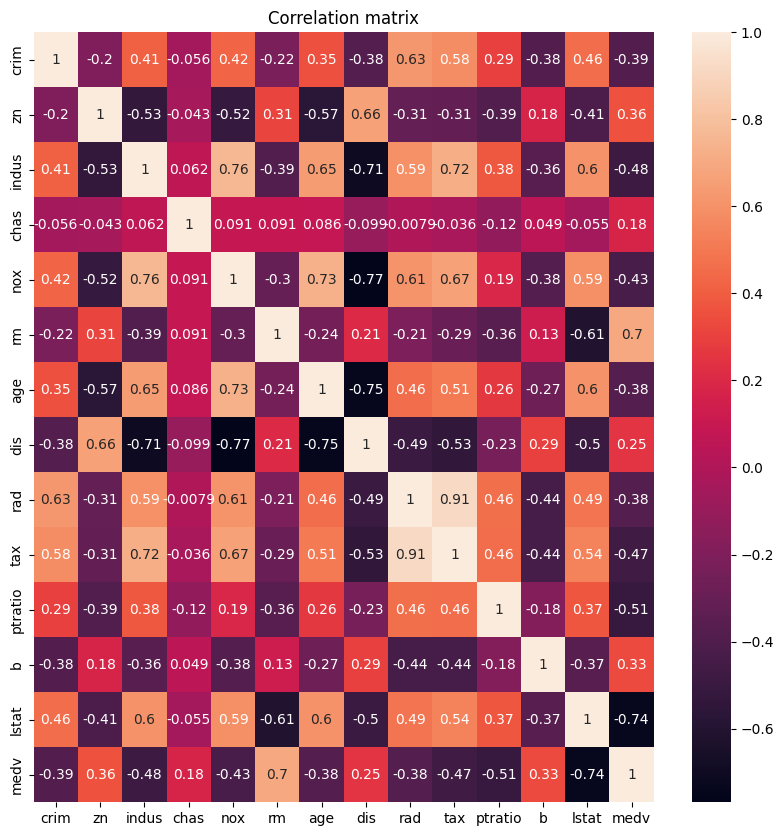

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(house.corr(),annot=True,)
plt.title("Correlation matrix")
plt.show()

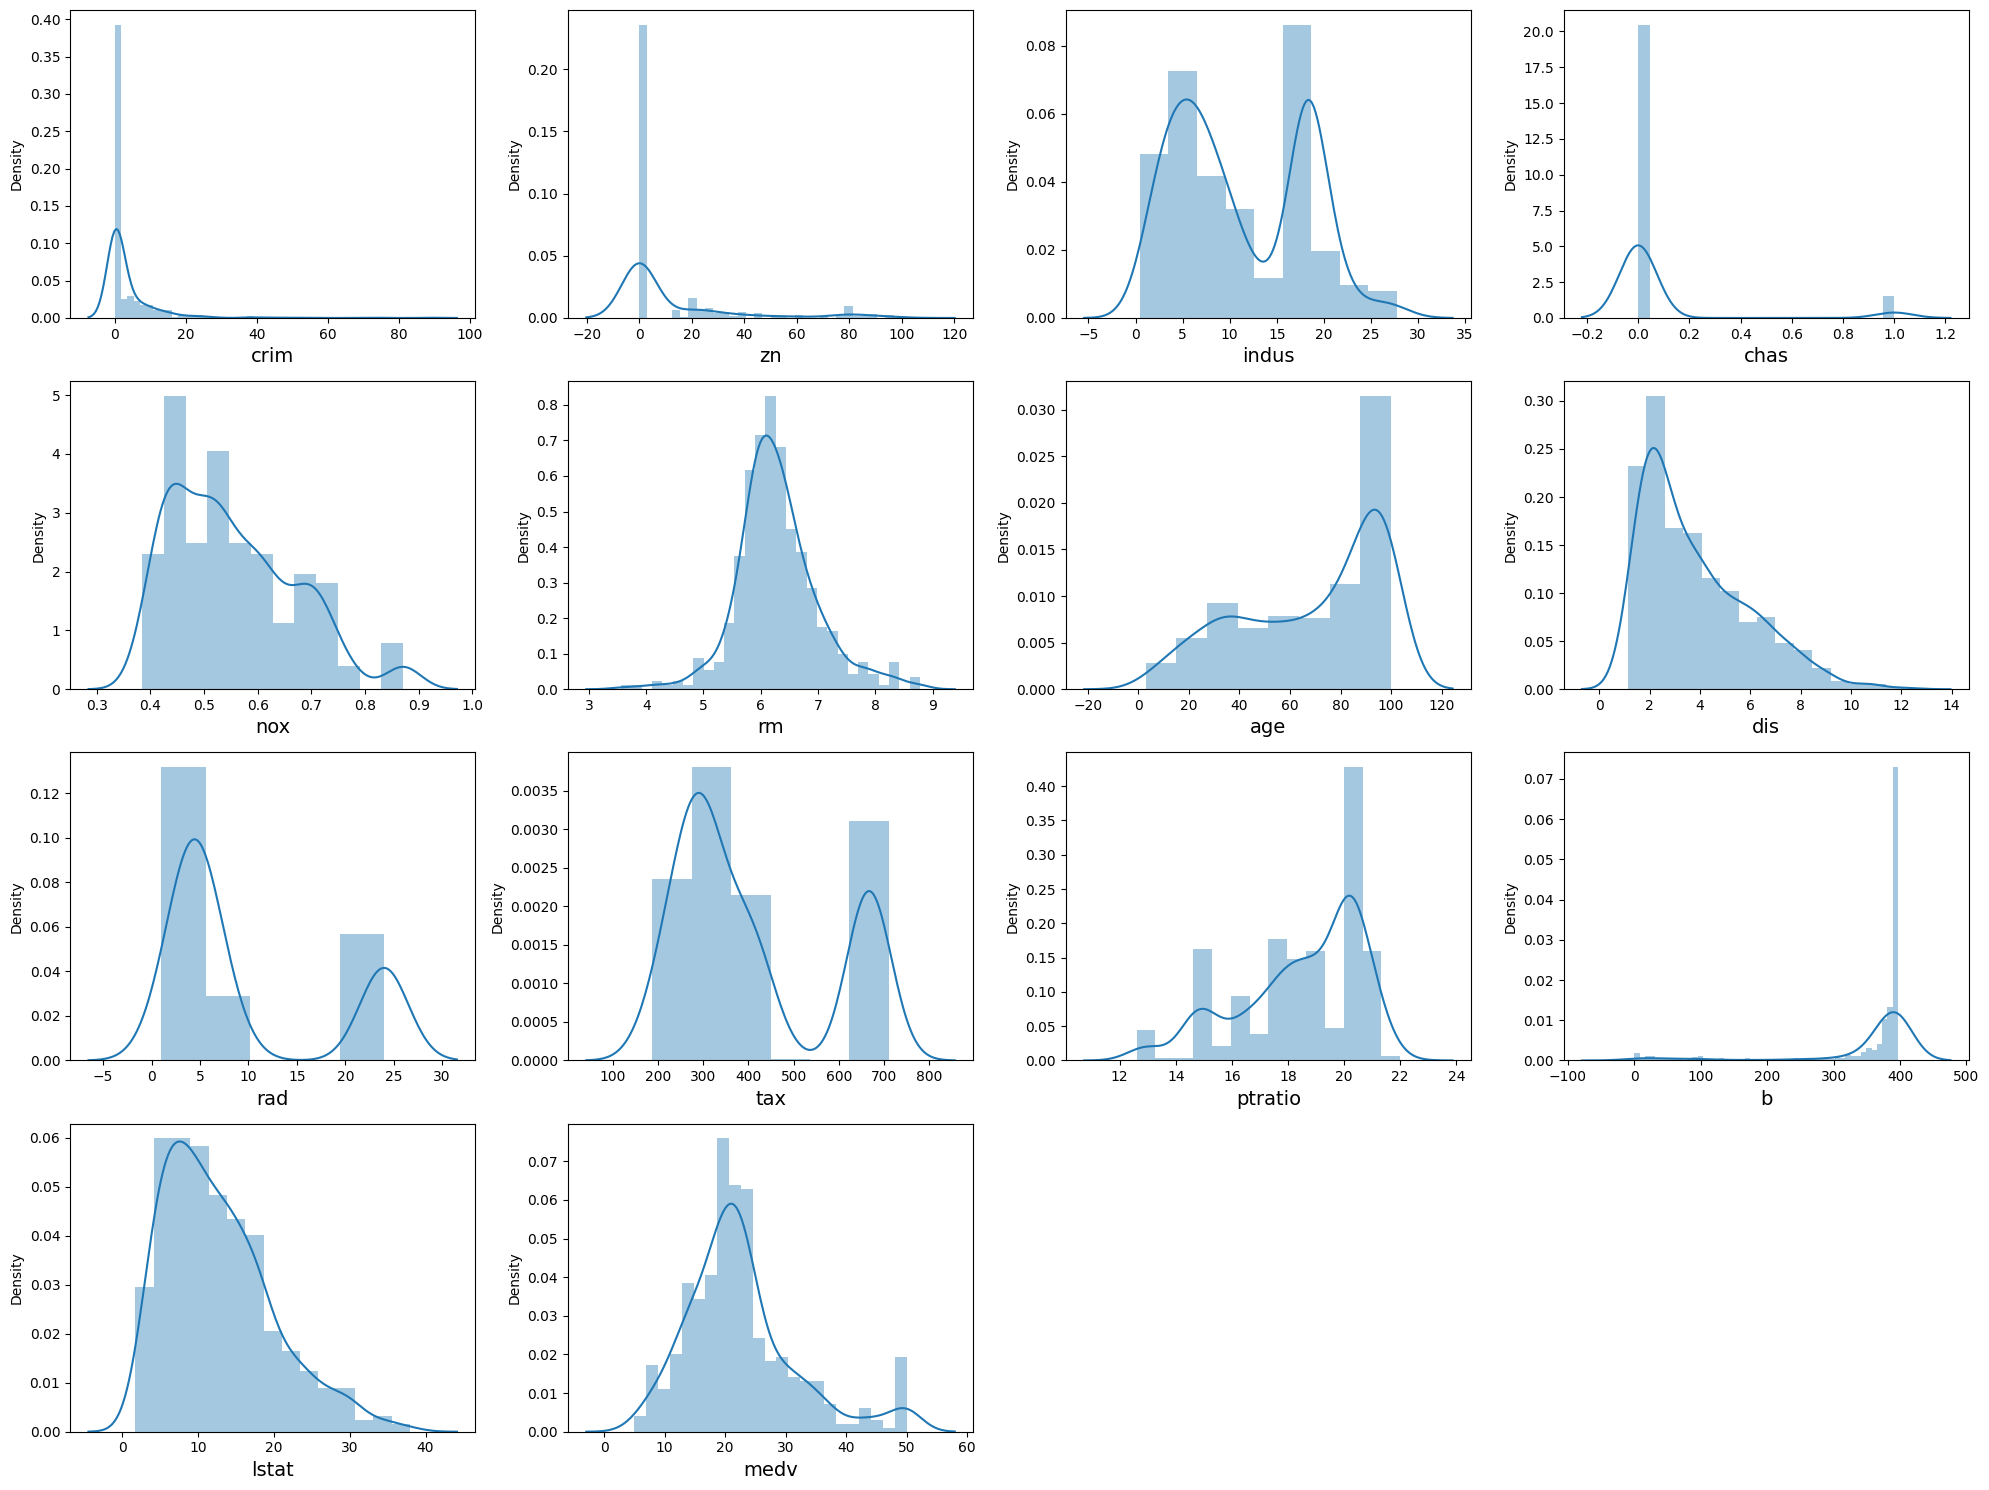

In [24]:
#Univariate Analysis

plt.figure(figsize=(20,15),facecolor='White')
plotnumber = 1

for column in house:
  if plotnumber < 16:
    ax = plt.subplot(4,4,plotnumber)
    sns.distplot(house[column])
    plt.xlabel(column,fontsize=14)
  plotnumber += 1
plt.tight_layout()

In [25]:
# Discrete Feature

discrete_feature = [feature for feature in house.columns if house[feature].nunique()<50]
print("Discrete Variables Count:{}".format(len(discrete_feature)))
house[discrete_feature].head()

Discrete Variables Count:4


,zn,chas,rad,ptratio
0,0.0,0.0,2.0,17.8
1,0.0,0.0,2.0,17.8
2,0.0,0.0,3.0,18.7
3,0.0,0.0,3.0,18.7
4,0.0,0.0,3.0,18.7


In [26]:
# Continous Feature

continous_feature = [feature for feature in house.columns if house[feature].nunique()>50]
print("Continous Variables Count:{}".format(len(continous_feature)))
house[continous_feature].head()

Continous Variables Count:10


,crim,indus,nox,rm,age,dis,tax,b,lstat,medv
0,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,396.90,9.14,21.6
1,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,392.83,4.03,34.7
2,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,394.63,2.94,33.4
3,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,396.90,5.33,36.2
4,0.02985,2.18,0.458,6.430,58.7,6.0622,222.0,394.12,5.21,28.7


<Axes: >

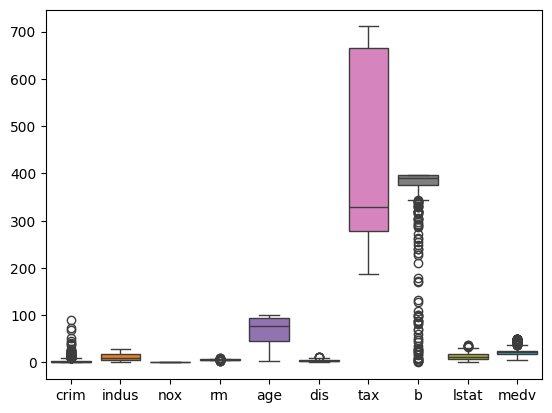

In [27]:
#Boxplot
sns.boxplot(house[continous_feature])

In [28]:
#Splitting data

X = house.drop(['medv'],axis =1)
y = house['medv']

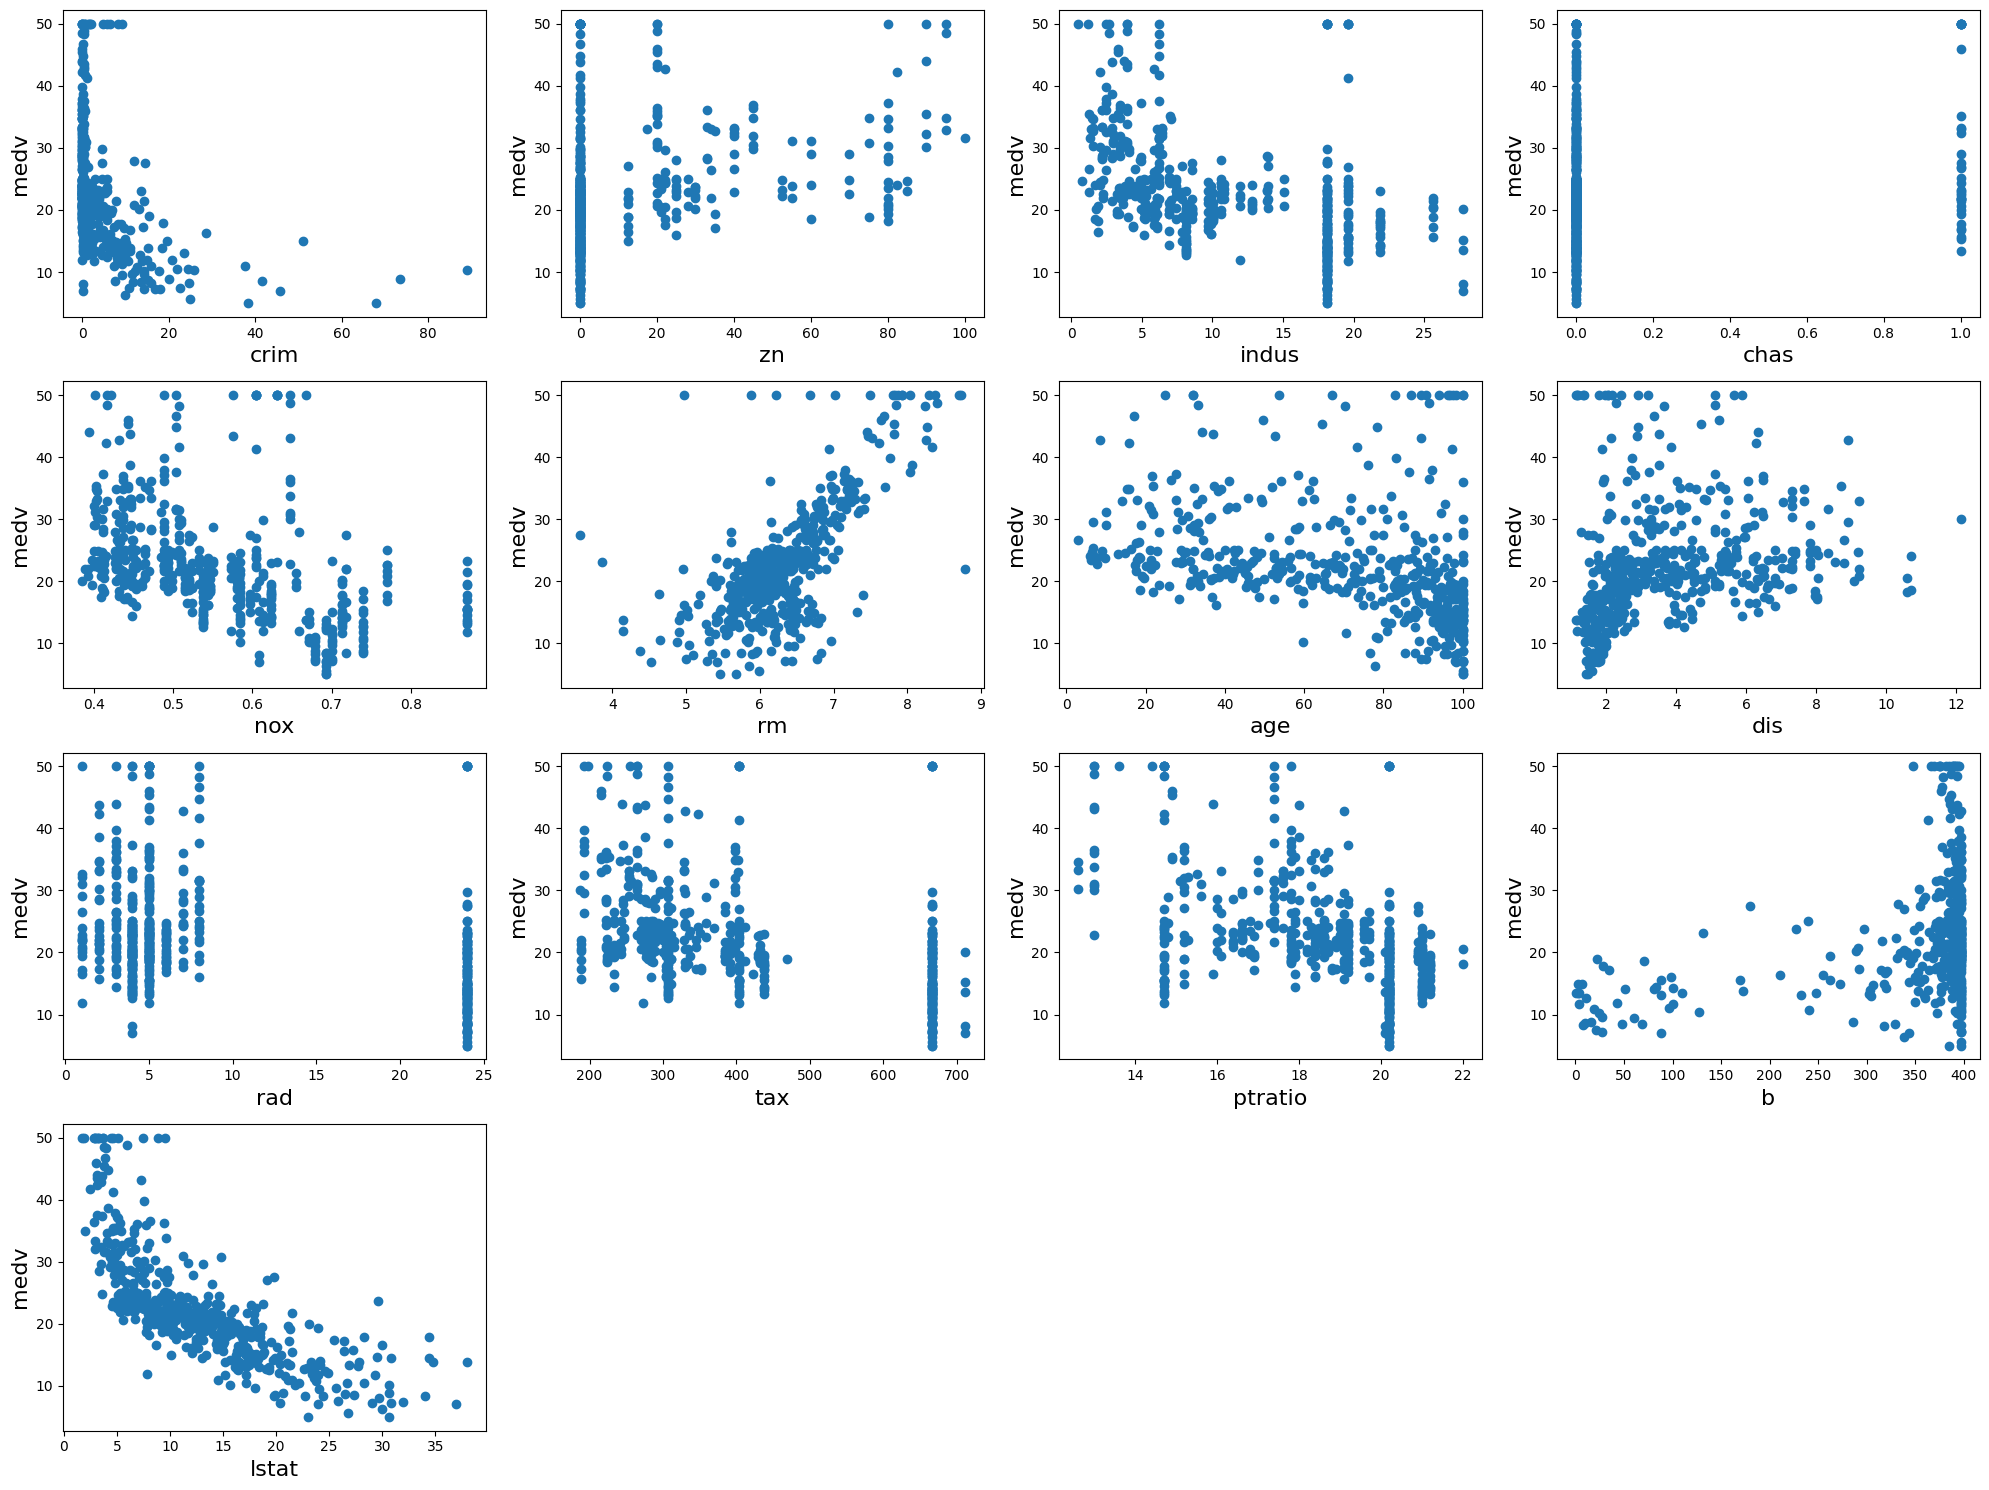

In [29]:
# Bivariate Analysis

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in X:
  if plotnumber < 16:
    ax = plt.subplot(4,4,plotnumber)
    plt.scatter(X[column],y)
    plt.xlabel(column,fontsize = 16)
    plt.ylabel('medv',fontsize = 16)
  plotnumber += 1
plt.tight_layout()

In [30]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [33]:
vif

,VIF,Features
0,1.791926,crim
1,2.299062,zn
2,4.004044,indus
3,1.074054,chas
4,4.396809,nox
5,1.934734,rm
6,3.102346,age
7,3.956588,dis
8,7.491429,rad
9,9.031525,tax


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
X = X.drop(['tax'],axis = 1)

In [36]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(101, 12)
(404,)
(101,)


In [38]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr

SVR(kernel='linear')

In [39]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [40]:
print(svr.coef_)

[[-0.08753736  0.01630977 -0.04608425  1.43838054 -2.06862402  5.81961687
  -0.03587896 -0.86177842 -0.03499158 -0.72330154  0.01560315 -0.32093381]]


In [41]:
y_pred = svr.predict(X_test)
y_pred

array([23.60224623, 31.15231743, 17.41336357, 24.3202107 , 32.63600284,
       22.78973015,  8.84196412,  6.30115062, 19.31201049, 20.57001662,
       25.94939222, 20.07612342, 24.17560121, 21.7344209 , 17.7700734 ,
       23.91942297, 19.60522076,  7.74942523, 35.66814041, 16.98965943,
       26.41294439, 32.56377552, 17.59556495, 24.48883675, 16.1746817 ,
       11.38816101, 27.89121327, 21.72933821, 14.58284054, 19.27053595,
       26.56649128, 13.82171216, 25.0897064 , 18.95772288, 18.95796654,
       23.363292  , 29.07804154, 19.62806488, 13.94995613, 26.09794539,
       14.6567509 , 18.25994956, 22.37004215, 20.78038182, 26.03795844,
       29.70540029, 13.83510469, 21.51063993, 18.04881397, 23.96019117,
       21.49342284, 37.55856572, 14.27182291, 17.4695472 , 22.20002558,
       20.9747611 , 18.10231872, 32.12528666, 26.8329572 , 20.29511454,
       25.30031563, 24.89576316, 21.81103607, 17.85006274, 13.51146672,
       19.6502266 , 19.4546598 , 23.34896877, 32.73800621,  9.98

In [42]:
print(r2_score(y_test,y_pred))

0.6118075725934644


In [43]:
# Hyperparameter Tuning ith SVR

param_grid = {'C':[0.1,1,10,100],
              'gamma':[1,0.1,0.01],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]}

svr_grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [44]:
svr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.731 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.676 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.613 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.726 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.640 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.731 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.676 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.613 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.726 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.640 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['linear']},
             verbose=3)

In [45]:
svr_grid.best_params_

{'C': 0.1, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [49]:
best_svr = svr_grid.best_estimator_
y_pred_hp = best_svr.predict(X_test)
y_pred_hp

array([25.52098868, 31.49883049, 16.32072986, 23.29298624, 31.98797063,
       22.38298978,  9.70756402,  5.14983726, 19.93989577, 21.11685493,
       25.23968086, 18.49807994, 24.003706  , 21.98144745, 19.1668093 ,
       24.78755883, 18.91118696,  7.6274725 , 35.12682487, 17.09927217,
       26.52402533, 32.35346796, 18.30676542, 23.72922779, 17.53664428,
       10.64179015, 27.53028264, 21.49857483, 13.82630591, 20.23566981,
       27.43002213, 13.37822426, 22.74844946, 20.25181544, 18.82549911,
       22.99016981, 28.2314143 , 20.56231824, 13.69414693, 25.19977665,
       15.41057193, 18.3053687 , 22.25503311, 21.37684757, 26.65364892,
       29.96305598, 13.46762787, 21.00315697, 18.14062862, 23.8177498 ,
       21.19802066, 34.98875523, 14.34879051, 18.63848391, 22.14141717,
       21.06204465, 18.68447476, 32.11546303, 26.53321263, 20.49220791,
       23.35761331, 26.31044987, 22.89434366, 19.26816336, 12.57483962,
       18.74816433, 19.09762148, 24.30675466, 33.1034663 , 11.52

In [55]:
# Metric

print("The value of R2_Score:",r2_score(y_test,y_pred_hp))
print("The value of MAE:",mean_squared_error(y_test,y_pred_hp))

The value of R2_Score: 0.6696520208898662
The value of MAE: 18.40770184141813
